<a href="https://colab.research.google.com/github/Rogerio-mack/Visualizacao-de-Dados-em-Python/blob/main/c0_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**
<hr>

A visualização de dados é antes de tudo uma forma de transmitir ou comunicar os dados com precisão, e existem ao menos dois tipos de Visualização de Dados com requisitos bastante diferentes. O primeiro é voltado para a análise e envolve a  **Exploração dos Dados** como a descoberta padrões, relações e processos em ação sobre os dados. Neste tipo de visualização você experimenta diferentes tipos de gráficos e visualizações, de transformações e seleções dos dados. Aspectos estéticos das figuras tem aqui uma importância secundária. 

O segundo tipo de visualização tem por objetivo a **Apresentação de Resultados** e busca fornecer informações claras e visualmente atraentes para uma apresentação ou uma publicação. Aqui, a qualidade das figuras produzidas é  essencial e elas devem ser atraentes e comunicar de forma eficiente os dados a um determinado público.

Ambos os tipos de visualização podem ser feitos com `Python`, assim como em outras linguagens ou ferramentas. Como um texto introdutório os recursos que estudaremos neste livro serão mais voltados para análise e exploração de dados, mas podem ser igualmente empregados na produção de visualizações finais.

$\rightarrow$ *Existem ao menos dois tipos de visualização de dados com requisitos bastante diferentes, e podemos dizer que existem **Gráficos de Exploração** e **Gráficos de Apresentação**.*



## Importância da Visualização de Dados




O Quarteto de Anscombe (F.J. Anscombe, 1973) é um exemplo conhecido que ilustra o valor da visualização para o entendimento dos dados mesmo quando várias informações, como variáveis estatísticas, podem ser obtidas. Ele é formado por quatro conjuntos de dados que aparentam idênticos quando observados valores da estatística descritiva, como a média e a variância, mas que são muito distintos quando observados graficamente. 

Esses conjuntos apresentam, com até 3 casas decimais, as mesmas médias e variâncias, sendo todos aproximados pelo mesmo modelo de regressão linear:

$$ y = 3 + 0.5 x$$

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

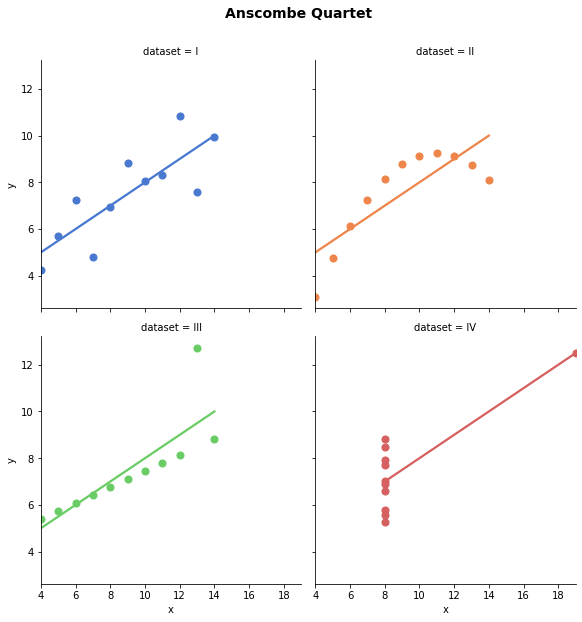

In [ ]:
# Load Anscombe's quartet
df = sns.load_dataset("anscombe")

# Mostra os resultados de um modelo de regressão linear
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.suptitle('Anscombe Quartet', fontsize=14, weight='bold', y=1.05)
plt.show()

Não se preocupe com este código agora, você vai aprender mais sobre ele adiante. Aqui o importante é você entender que um exemplo bastante simples de dados já demonstra padrões e relações que podem ser difíceis de serem observadas sem o auxílio de uma visualização dos dados. 

Exemplos mais elaborados podem ser facilmente obtidos como você pode ver a seguir.  

In [ ]:
import pandas as pd
cars = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/mtcars.csv')
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


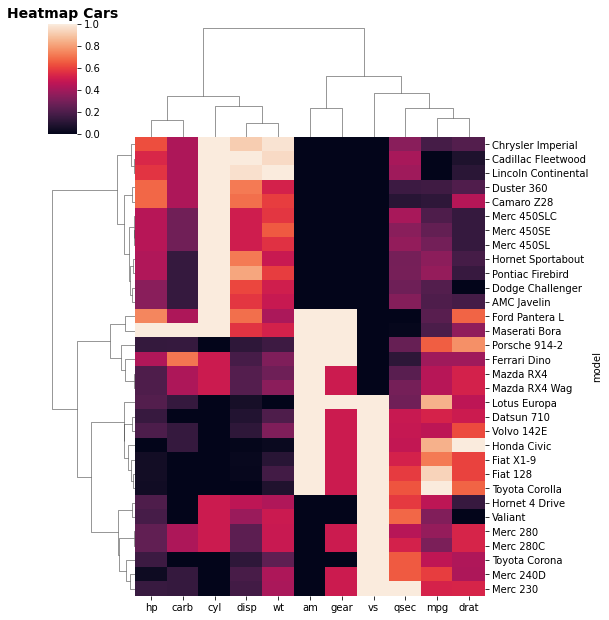

In [ ]:
sns.clustermap(cars.set_index('model'), metric='euclidean', standard_scale=1, method='ward', figsize=(8,8.5))
plt.title('Heatmap Cars', fontsize=14, weight='bold')
plt.show()


A visualização acima é um *Mapa de Calor* (*Heat Map*). Ele representa por de diferentes intensidades de cores os valores de cada atributo dos veículos. Ele permite observar padrões e relações sobre os dados que dificilmente poderíamos observar de outro modo. Podemos, por exemplo, identificar grupos de veículos com características comuns e, mesmo um leigo, pode facilmente compreender essas informações. 

A visualização de dados pode contribuir para a compreensão de dados bastante complexos e distantes dos dados numéricos e estruturados (tabelas) que talvez você esteja habituado. Gráficos como uma *Word Cloud* (abaixo) permitem analisar o conteúdo de uma coleção de documentos a partir das palavras mais frenquentes que eles apresentam. Isso tem uma série de aplicações práticas, como identificar as principais reclamações de clientes em um conjunto de e-mails ou os temas mais comentados no Twitter. 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




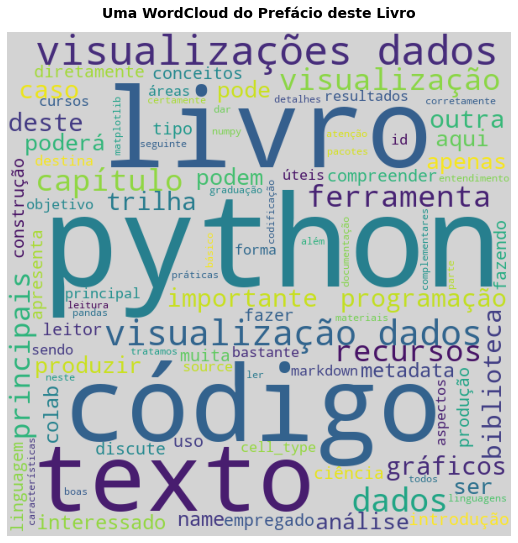

In [ ]:
# World Cloud a partir do texto de prefácio deste livro
import urllib.request  
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

texto = []
for line in urllib.request.urlopen('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/intro.ipynb'): 
    texto.append(line.decode('utf-8'))

stopwords = set( stopwords.words('portuguese'))

texto_string = ''
for line in texto: 
  texto_string = texto_string + ' ' + line.lower()  

wordcloud = WordCloud(width = 600, height = 600,
				background_color ='lightgrey',
				stopwords = stopwords,
				min_font_size = 10).generate(texto_string)

print('\n')
plt.figure(figsize = (7, 7), facecolor = None)
plt.suptitle('Uma WordCloud do Prefácio deste Livro', fontsize=14, weight='bold', y=1.05)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


Esses poucos exemplos já dá ideia do papel importante da visualização na  compreensão e a análise de grandes conjuntos de dados e, ao longo deste texto, você encontrará uma série de análises como essas.

## Fazendo Perguntas Relevantes sobre os Dados 

Compreender e analisar dados é basicamente buscar respostas para hipóteses que fazemos sobre os dados. Que tipo de perguntas podemos fazer sobre os dados e que a visualização poderá nos ajudar a responder? 

Podemos agrupar essas perguntas algumas categorias. Por exemplo, se estamos interessados em como a temperatura evolui ao longo do dia, nossa pergunta é sobre a *evolução* dessa variável e um gráfico de linhas o gráfico mais indicado para essa análise. Para cada uma das categorias há gráficos que, em geral, serão mais indicados:

> **Evolução** (ou *Tendência dos Dados*): gráficos de linha e de área, séries múltiplas

> **Distribuição**: histogramas, gráficos densidade de probabilidade, gráficos de caixa

> **Quantidades e Proporções**: gráficos de barras e pizza, mapas de árvore

> **Relações**: gráficos de dispersão, correlogramas e mapas de calor

Há certamente outras categorias e muitos outros tipos de gráficos. Mas por hora essas categorias são suficientes e veremos várias alternativas de gráficos para cada uma dessas classes de perguntas.  Boa parte deste livro se dedica a entender exatamente que gráficos empregar para obtermos respostas dos dados em cada um desses casos. 

Vamos ver mais alguns exemplos. Você pode explorar os códigos aqui se quiser, mas não precisa se preocupar com eles agora. Eles estão aqui apenas para produzir as figuras e os códigos serão discutidos mais adiante no texto. 




## Evolução

Muitas vezes estamos interessados na evolução dos valores de uma variável com relação ao tempo ou alguma outra variável. Queremos saber sobre a tendência dessa evolução, sobre a probabilidade de se alcançar um certo valor ou ainda queremos comparar a evolução de duas variáveis que esperamos tenham alguma relação. 

Quando essas variáveis são numéricas, um gráfico de linhas é frequentemente usado para visualizar a tendência dos dados e responder a essas perguntas. Quando uma dessas variáveis representa o tempo, denominamos o conjunto de dados como séries temporais. 

A visualização permite *entendermos* como uma variável evolui com relação a outra. Por exemplo, você pode identificar tendências de longo prazo e flutuações da moeda americana exibindo sua evolução a partir de um gráfico de linhas. 



In [ ]:
# Obtendo os dados
bovespa = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/mystocksn.csv')
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce') 
bovespa.head()

,data,IBOV,VALE3,PETR4,DOLAR
0,2020-02-27,102984.0,9.92,12.08,4.4491
1,2020-02-28,104172.0,9.82,12.10,4.4848
2,2020-03-02,106625.0,10.27,12.49,4.4413
3,2020-03-03,105537.0,10.22,12.16,4.4724
4,2020-03-04,107224.0,10.56,12.33,4.5132


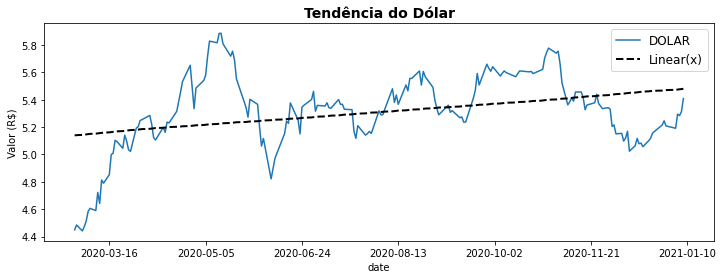

In [ ]:
# Construindo o gráfico
import matplotlib.ticker as ticker
import numpy as np
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.set_title('Tendência do Dólar', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")
ax.legend(fontsize=12)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

## Distribuição  

Os dados a seguir são da Organização Mundial e Saúde (*WHO World Health Organization*) e incluem diversos indicadores de saúde e de desenvolvimento dos países. Uma pergunta relevante que você poderia fazer sobre os dados é sobre como são  distribuídos os valores de Produto Interno Bruto dos países ou ainda a Expectativa de Vida média dos indivíduos entre países Desenvolvidos e em Desenvolvimento. 






In [ ]:
# Obtendo os dados
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,98,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


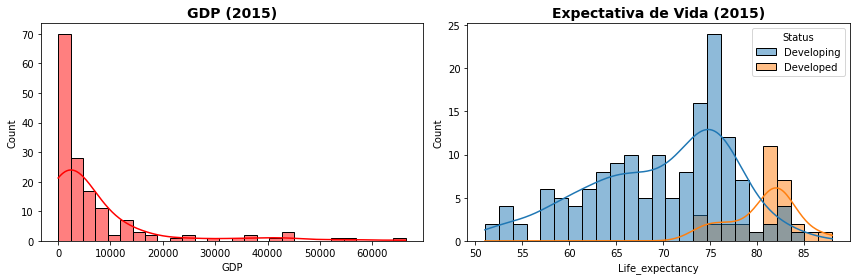

In [ ]:
# Construindo o gráfico
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=WHO, x='GDP', kde=True, color="red", ax=axs[0])
axs[0].set_title('GDP (2015)', fontsize=14, weight='bold') 

sns.histplot(x='Life_expectancy', data=WHO, hue='Status', kde=True, ax=axs[1], bins=25)
axs[1].set_title('Expectativa de Vida (2015)', fontsize=14, weight='bold') 

plt.tight_layout()
plt.show()

Como você pode ver, dados de PIB e Expectativa de Vida apresentam distribuições bastante diferentes, e se você conhece um pouco sobre técnicas de estatística, sabe que identificar a forma dessas distribuições é bastante importante para solução de problemas de inferência e o entendimento dos dados.

## Quantidades e Proporções 

Muitas vezes não estamos interessados na evolução ou na distribuição dos dados, mas queremos acessar os valores diretamente em suas unidades, exibindo os valores ou suas proporções para diferentes classes e ou comparar diferentes conjuntos de dados. 

Para isso os gráficos de barras tem várias variantes e são normalmente empregados. Eles permitem exibir as quantidades de uma ou mais variáveis separadas por diferentes categorias ou classes. 

In [ ]:
# Obtendo os dados
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


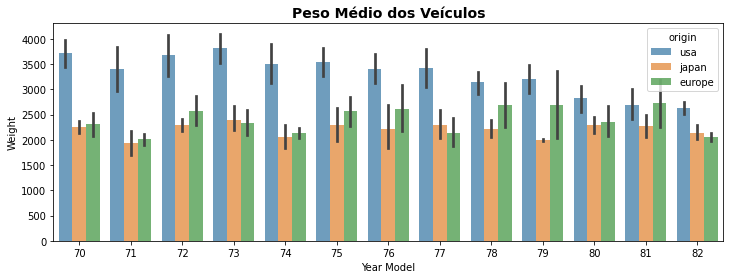

In [ ]:
# Construindo o gráfico
from matplotlib import cm
fig = plt.figure(figsize=(12,4))

sns.barplot(x='model_year', y='weight', data=cars, hue='origin', alpha=0.7)

plt.title('Peso Médio dos Veículos',fontsize=14,weight='bold')
plt.xlabel('Year Model')
plt.ylabel('Weight')

plt.show()


O gráfico acima, por exemplo, traz o peso médio dos veículos produzidos nos USA, Japão e Europa ao longo dos anos e a linha sobre as barras indica o intervalo de confiança (95%) dos dados. Ele permite comparar, então, o pesos dos veículos produzidos em cada região.

## Relações 

Por último, você pode querer analisar relações entre os dados. Essas relações são muitas vezes denominadas de modo bastante geral como correlações. Na estatística, entretanto, a correlação refere-se unicamente a uma relação *linear* entre os dados. Assim, preferimos empregar aqui o termo relações. Embora relações lineares (correlações) sejam as relações mais comuns que buscamos nos dados, a visualização permite encontrarmos muitos outros padrões além do padrão linear. 

Os dados abaixo são de uma organização para o desenvolvimento sustentável global (*Gapminder*). Eles exibem relações entre renda, expectativa de vida e o índice de percepção de corrupção (*CPI Corruption Perceptions Index*) de diferentes países e permitem observar, por exemplo, que maiores valores de renda dos países estão associados a uma maior expectativa de vida, mas também a uma maior percepção de corrupção nos países.


In [ ]:
# Obtendo os dados
gap = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/gapminder_2015.csv')
gap.head()

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index,LifeExpect,HappyIdx,SchoolYears15_24,VacineBelieve,ChildMortality,Co2Emissions,CPI,Population
0,Africa,Botswana,2015,78.7,15700,32.1,24.7,60.5,66.9,0.376,8.40,NaN,40.7,2.560,63.0,2120000
1,Africa,Burkina Faso,2015,47.0,1600,24.3,15.1,35.5,60.7,0.442,3.76,NaN,86.8,0.182,38.0,18100000
2,Africa,Cote d'Ivoire,2015,33.1,3230,20.1,15.4,41.6,61.0,0.445,6.59,NaN,90.0,0.405,32.0,23200000
3,Africa,Egypt,2015,31.8,10200,14.3,12.5,31.2,70.2,0.476,10.60,NaN,23.6,2.370,36.0,92400000
4,Africa,Kenya,2015,53.3,2800,21.5,16.3,41.5,64.7,0.436,9.06,NaN,46.3,0.341,25.0,47900000


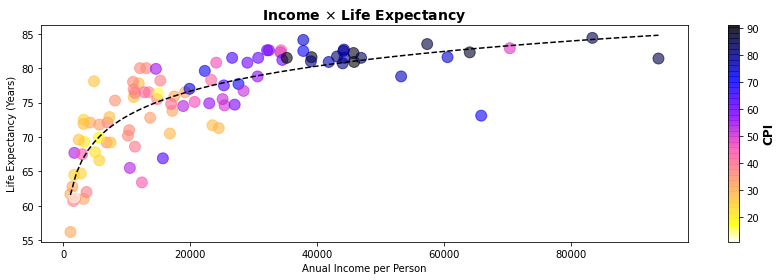

In [ ]:
# Construindo o gráfico
plt.figure(figsize=(12, 4))

plt.scatter(gap['income_per_person'],gap['LifeExpect'], alpha=0.6, s=120, c=gap['CPI'], cmap=cm.gnuplot2_r)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar()
cbar.set_label('CPI', fontsize=12, weight='bold')

# Produzindo o ajuste da curva
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*np.log(x) + b

coefs, covar = curve_fit(func, gap['income_per_person'], gap['LifeExpect'])

x = np.linspace(gap['income_per_person'].min(), gap['income_per_person'].max(), 100)
y = func(x,*coefs)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.tight_layout()
plt.show()

<br>
<br>

Cada uma dessas categorias de análise que você viu aqui serão tratadas em detalhe havendo um capítulo para cada uma delas. 

O domínio de linguagens e ferramentas como o `Python` para produzir  visualizações são um aspecto importante para que você obtenha resultados corretos na Visualização de Dados. Mas tão importante quanto esse domínio técnico da produção de visualizações dos dados é ter um *pensamento analítico* sobre os dados compreendendo quê perguntas você está buscando responder sobre eles. Sem isso, produzir visualizações dos dados não passaria de um exercício gráfico e qualquer caminho parece ser bom quando não se tem ideia onde se quer chegar. 